In [50]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [51]:
Min, Max, N = 0.,40.,11
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [52]:
def h1(y):
    return 100.
def h2(y):
    return 0.
def h3(x):
    return 0.
def h4(x):
    return 0.

In [53]:
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [54]:
def GetRelaxation(T, omega, Nit = int(1e5),  tolerancia = 1e-2):
    
    itmax = 0
    
    for it in range(Nit):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
        
        if np.abs(dmax) < tolerancia:
            print(it)
            itmax = it
            break
            
    return T,itmax

In [55]:
omega = np.arange(0.1,2.0, 0.1)

iterations =[]
count = 0
for val in omega:
    T = InitT()
    Tf1,ite =  GetRelaxation(T, omega=val)
    count +=1
   

    iterations.append(ite)

585
345
243
185
147
120
99
83
69
58
49
40
33
25
18
19
19
32
64


In [56]:
min_it = min(iterations)
min_ = np.argmin(iterations)
w_opt= omega[min_]

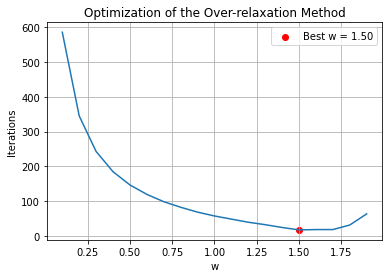

In [57]:
plt.title("Optimization of the Over-relaxation Method")
plt.plot(omega, iterations)
plt.scatter(w_opt, min_it, c = 'r', label = "Best w = {:.2f}".format(w_opt))
plt.xlabel('w')
plt.ylabel('Iterations')
plt.grid()
plt.legend()
plt.show()


El parámetro óptimo es 1.5

Si $w \geq 2$ el método de sobre relajación no converge porque el radio espectral de la matriz > 1.